In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import spearmanr

from urllib.request import urlopen
import json
import plotly.express as px

In [84]:
data = pd.read_stata("r30i_os_53.dta", convert_categoricals=False)
data

,idind,zredid_i,zid_i,zid_h,yid_i,yid_h,xid_i,xid_h,wid_i,wid_h,...,zl53,zl54,zm96,zm97,zm98,zm99,zm100,zm101,zm109,zm111
0,3,56001,1001201,10012,1001201.0,10012.0,1001201.0,10012.0,1001201.0,10012.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,55601,1000301,10003,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,55701,1000401,10004,1000401.0,10004.0,1000401.0,10004.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36,56701,1002401,10024,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60,58102,1004702,10047,1004702.0,10047.0,1004702.0,10047.0,1004702.0,10047.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12064,61442,631902,1423080102,14230801,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12065,61443,632001,1423081601,14230816,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12066,61444,632101,1423081701,14230817,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12067,61445,632201,1423081801,14230818,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
data.groupby('zj65').count()['idind']

zj65
1.0            715
2.0           4500
3.0           2766
4.0           1672
5.0            585
99999997.0      63
99999998.0       2
99999999.0      16
Name: idind, dtype: int64

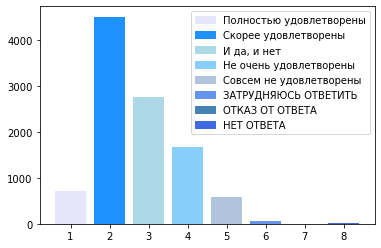

In [15]:
fig, ax = plt.subplots(1,1)
data_udov = data.groupby('zj65').count()['idind']
label_name = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены", "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "ОТКАЗ ОТ ОТВЕТА", "НЕТ ОТВЕТА"]
label_code = ['1', '2', '3', '4', '5', '6', '7', '8']
colors = {'Полностью удовлетворены':'lavender', "Скорее удовлетворены":'dodgerblue', 'И да, и нет':'lightblue', 'Не очень удовлетворены':'lightskyblue', 'Совсем не удовлетворены':'lightsteelblue', 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':'cornflowerblue', 'ОТКАЗ ОТ ОТВЕТА':'steelblue', 'НЕТ ОТВЕТА':'royalblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)




ax.bar(label_code, list(data_udov.values), label = labels, color = colors.values())

plt.show()

## Пол

In [19]:
data[data["zh5"] == 1].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()

zj65
1.0     316
2.0    1940
3.0    1138
4.0     619
5.0     231
Name: count, dtype: int64

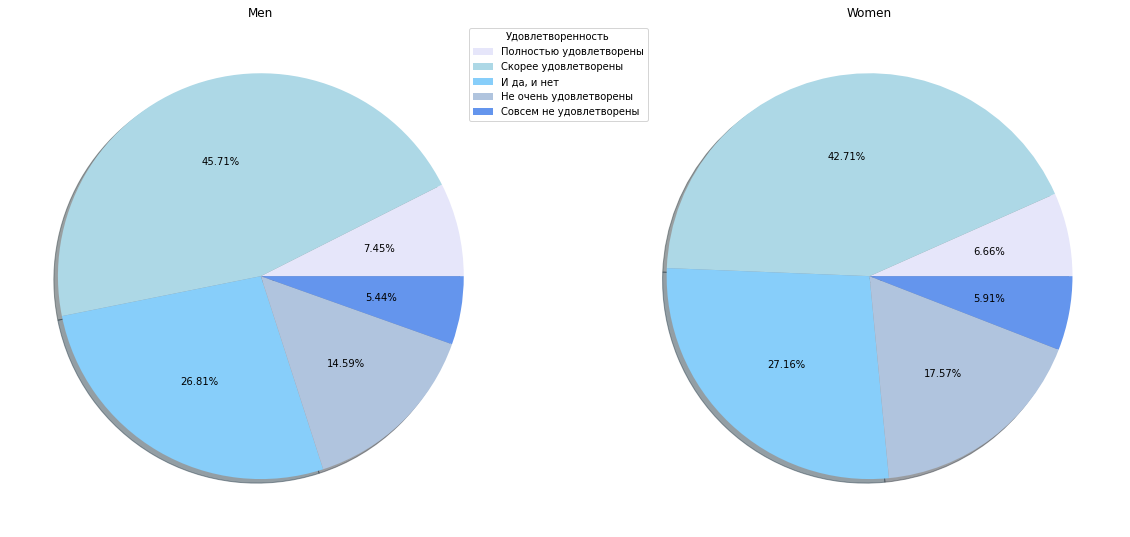

In [20]:
data_man = data[data["zh5"] == 1]
data_woman = data[data["zh5"] == 2]
data_zj65_man = data_man.value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()
data_zj65_woman = data_woman.value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()
label_name = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены"]


fig, axs = plt.subplots(figsize=(20, 30),nrows= 1 , ncols=2)
colors =[ 'lavender', 'lightblue', 'lightskyblue', 'lightsteelblue', 'cornflowerblue']
axs[0].pie(data_zj65_man, autopct="%.2f%%", colors = colors, shadow = True)
axs[0].set_title("Men")
axs[1].pie(data_zj65_woman, autopct="%.2f%%", colors = colors, shadow = True)
axs[1].set_title("Women")

axs[0].legend(label_name,
          title="Удовлетворенность",
          loc="upper left",
          bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

In [185]:
data[(data["zh5"] == 1) & (data["zj65"] != 99999999.0) & (data["zj65"] != 99999997.0) & (data["zj65"] != 99999998.0)]['zj65']

6        2.0
13       3.0
14       4.0
16       2.0
18       2.0
        ... 
12058    NaN
12061    2.0
12063    3.0
12066    2.0
12068    3.0
Name: zj65, Length: 5162, dtype: float64

In [160]:
data_man = data[(data["zh5"] == 1) & (data["zj65"] != 99999999.0) & (data["zj65"] != 99999997.0) & (data["zj65"] != 99999998.0)]['zj65'].dropna()
data_woman = data[(data["zh5"] == 2) & (data["zj65"] != 99999999.0) & (data["zj65"] != 99999997.0) & (data["zj65"] != 99999998.0)]['zj65'].dropna()
stats.f_oneway(data_man, data_woman)

F_onewayResult(statistic=17.583439190043553, pvalue=2.7728765861962058e-05)

## Возраст

In [309]:
data_age_18 = data[data['z_age'] < 18]['zj65'].dropna()
data_age_18_19 = data[(18 <= data['z_age']) & (data['z_age'] < 20)]['zj65'].dropna()
data_age_20_24 = data[(20 <= data['z_age']) & (data['z_age'] < 25)]['zj65'].dropna()
data_age_25_29 = data[(25 <= data['z_age']) & (data['z_age'] < 30)]['zj65'].dropna()
data_age_30_44 = data[(30 <= data['z_age']) & (data['z_age'] < 45)]['zj65'].dropna()
data_age_45_59 = data[(45 <= data['z_age']) & (data['z_age'] < 60)]['zj65'].dropna()
data_age_60_69 = data[(60 <= data['z_age']) & (data['z_age'] < 70)]['zj65'].dropna()
data_age_70 = data[70 <= data['z_age']]['zj65'].dropna()
stats.f_oneway(data_age_18, data_age_18_19, data_age_20_24, data_age_25_29, data_age_30_44, data_age_45_59, data_age_60_69, data_age_70)

F_onewayResult(statistic=1.1256914830828404, pvalue=0.34340789077230915)

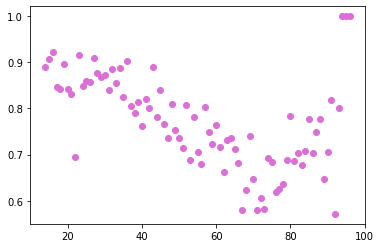

In [191]:
data_poln_udov = data[(data["zh5"] == 2) & ((data['zj65'] == 1.0) | (data['zj65'] == 2.0) | (data['zj65'] == 3.0))]
data_prodcent = data_poln_udov.value_counts('z_age').sort_index() / data[(data["zh5"] == 2)].value_counts('z_age').sort_index()
plt.scatter(data_prodcent.sort_index().keys(), data_prodcent.sort_index(), c='orchid')
plt.show()

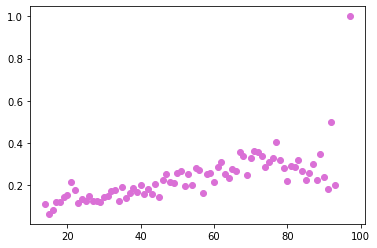

In [85]:
data_poln_udov = data[(data['zj65'] == 4.0) | (data['zj65'] == 5.0)]
data_prodcent = data_poln_udov.value_counts('z_age').sort_index() / data.value_counts('z_age').sort_index()
plt.scatter(data_prodcent.sort_index().keys(), data_prodcent.sort_index(), c='orchid')
plt.show()

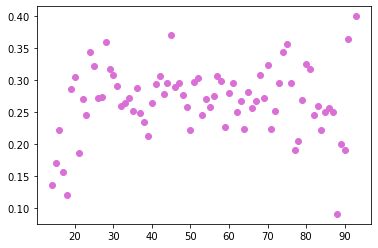

In [86]:
data_poln_udov = data[(data['zj65'] == 3.0)]
data_prodcent = data_poln_udov.value_counts('z_age').sort_index() / data.value_counts('z_age').sort_index()
plt.scatter(data_prodcent.sort_index().keys(), data_prodcent.sort_index(), c='orchid')
plt.show()

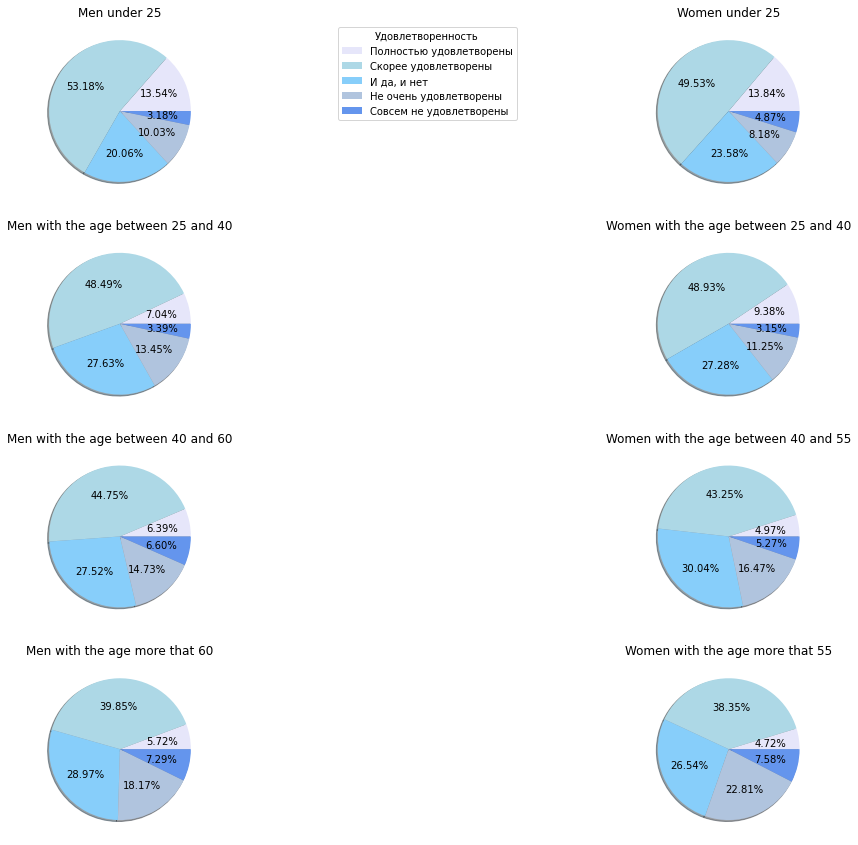

In [21]:
data_1 = data[(data["zh5"] == 1) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()
data_2  = data[(data["zh5"] == 1) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()
data_3  = data[(data["zh5"] == 1) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()
data_4 = data[(data["zh5"] == 1) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()
data_5  = data[(data["zh5"] == 2) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0]).sort_index()
data_6  = data[(data["zh5"] == 2) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0,]).sort_index()
data_7  = data[(data["zh5"] == 2) & (data["z_age"] >= 40) & (data["z_age"] < 55)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()
data_8  = data[(data["zh5"] == 2) & (data["z_age"] >= 55)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()

label_name = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены"]



fig, axs = plt.subplots(figsize=(20, 15),nrows= 4 , ncols=2)
colors =[ 'lavender', 'lightblue', 'lightskyblue', 'lightsteelblue', 'cornflowerblue']
axs[0][0].pie(data_1, autopct="%.2f%%", colors = colors, shadow = True)
axs[0][0].set_title("Men under 25")
axs[1][0].pie(data_2, autopct="%.2f%%", colors = colors, shadow = True)
axs[1][0].set_title("Men with the age between 25 and 40")
axs[2][0].pie(data_3, autopct="%.2f%%", colors = colors, shadow = True)
axs[2][0].set_title("Men with the age between 40 and 60")
axs[3][0].pie(data_4, autopct="%.2f%%", colors = colors, shadow = True)
axs[3][0].set_title("Men with the age more that 60")

axs[0][1].pie(data_5, autopct="%.2f%%", colors = colors, shadow = True)
axs[0][1].set_title("Women under 25")
axs[1][1].pie(data_6, autopct="%.2f%%", colors = colors, shadow = True)
axs[1][1].set_title("Women with the age between 25 and 40")
axs[2][1].pie(data_7, autopct="%.2f%%", colors = colors, shadow = True)
axs[2][1].set_title("Women with the age between 40 and 55")
axs[3][1].pie(data_8, autopct="%.2f%%", colors = colors, shadow = True)
axs[3][1].set_title("Women with the age more that 55")

axs[0][0].legend(label_name,
          title="Удовлетворенность",
          loc="upper left",
          bbox_to_anchor=(1.7, 0, 0.5, 1))
plt.show()

In [68]:
data[(data["zh5"] == 1) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[3:5]

zj65
3.0    126
4.0     63
5.0     20
Name: count, dtype: int64

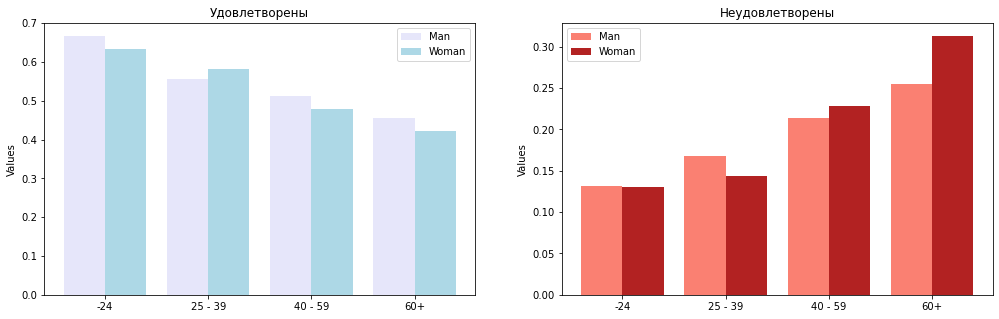

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(17, 5))
data_1 = (data[(data["zh5"] == 1) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[0:2].sum() 
          / data[(data["zh5"] == 1) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_2  = (data[(data["zh5"] == 1) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[0:2].sum() /
          data[(data["zh5"] == 1) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_3  = (data[(data["zh5"] == 1) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[0:2].sum() /
          data[(data["zh5"] == 1) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_4 = (data[(data["zh5"] == 1) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()[0:2].sum() /
         data[(data["zh5"] == 1) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index().sum())
data_5  = (data[(data["zh5"] == 2) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0]).sort_index()[0:2].sum() /
          data[(data["zh5"] == 2) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0]).sort_index().sum())
data_6  = (data[(data["zh5"] == 2) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0,]).sort_index()[0:2].sum() /
          data[(data["zh5"] == 2) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0,]).sort_index().sum())
data_7  = (data[(data["zh5"] == 2) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()[0:2].sum() / 
          data[(data["zh5"] == 2) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index().sum())
data_8  = (data[(data["zh5"] == 2) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[0:2].sum() /
          data[(data["zh5"] == 2) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
x = np.arange(len(["-24", "25 - 39","40 - 59","60+"]))

# x = np.arange(len(data_for_corr.value_counts('zj1_1_3').sort_index().keys().to_list()))

data_man_by_age = [data_1, data_2, data_3, data_4]
data_woman_by_age = [data_5, data_6, data_7, data_8]
ax[0].bar(x, data_man_by_age, width=0.4, label='Man', color='lavender')
ax[0].bar(x + 0.4, data_woman_by_age, width=0.4, label='Woman', color='lightblue')
ax[0].set_xticks(np.arange(len(x)) + 0.4 / 2)
ax[0].set_xticklabels(["-24", "25 - 39","40 - 59","60+"])
ax[0].set_ylabel('Values')
ax[0].set_title('Удовлетворены')
ax[0].legend()



data_1 = (data[(data["zh5"] == 1) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[4:5].sum() 
          / data[(data["zh5"] == 1) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_2  = (data[(data["zh5"] == 1) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[4:5].sum() /
          data[(data["zh5"] == 1) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_3  = (data[(data["zh5"] == 1) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[4:5].sum() /
          data[(data["zh5"] == 1) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_4 = (data[(data["zh5"] == 1) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()[4:5].sum() /
         data[(data["zh5"] == 1) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index().sum())
data_5  = (data[(data["zh5"] == 2) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0]).sort_index()[4:5].sum() /
          data[(data["zh5"] == 2) & (data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0]).sort_index().sum())
data_6  = (data[(data["zh5"] == 2) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0,]).sort_index()[4:5].sum() /
          data[(data["zh5"] == 2) & (data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0,]).sort_index().sum())
data_7  = (data[(data["zh5"] == 2) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()[4:5].sum() / 
          data[(data["zh5"] == 2) & (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index().sum())
data_8  = (data[(data["zh5"] == 2) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[4:5].sum() /
          data[(data["zh5"] == 2) & (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
x = np.arange(len(["-24", "25 - 39","40 - 59","60+"]))

# x = np.arange(len(data_for_corr.value_counts('zj1_1_3').sort_index().keys().to_list()))

data_man_by_age = [data_1, data_2, data_3, data_4]
data_woman_by_age = [data_5, data_6, data_7, data_8]
ax[1].bar(x, data_man_by_age, width=0.4, label='Man', color='salmon')
ax[1].bar(x + 0.4, data_woman_by_age, width=0.4, label='Woman', color='firebrick')
ax[1].set_xticks(np.arange(len(x)) + 0.4 / 2)
ax[1].set_xticklabels(["-24", "25 - 39","40 - 59","60+"])
ax[1].set_title('Неудовлетворены')
ax[1].set_ylabel('Values')
ax[1].legend()

plt.show()

## Другие факторы

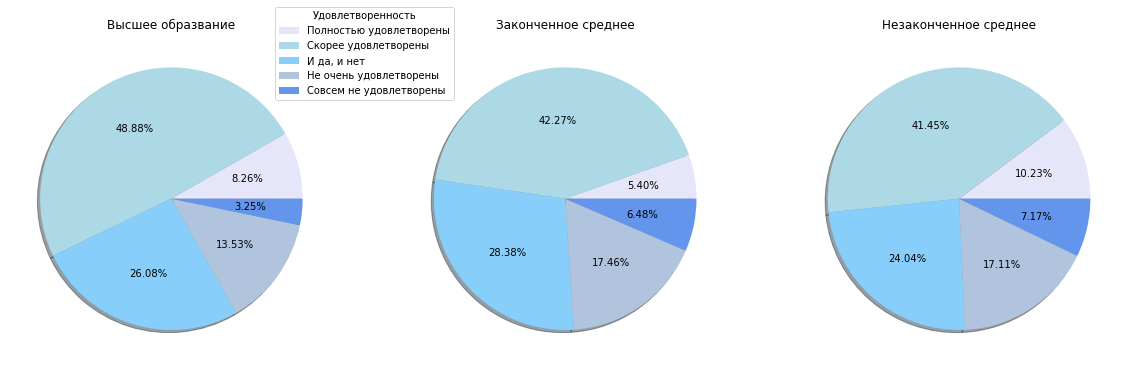

In [22]:
data_educ_6 = data[data["z_diplom"] == 6].sort_index()
data_educ_4_5  = data[(data["z_diplom"] == 4) | (data["z_diplom"] == 5)].sort_index()
data_educ_1_2_3  = data[(data["z_diplom"] == 1) | (data["z_diplom"] == 2) | (data["z_diplom"] == 3)].sort_index()
data_zj65_educ_6 = data_educ_6.value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()
data_zj65_educ_4_5 = data_educ_4_5.value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()
data_zj65_educ_1_2_3 = data_educ_1_2_3.value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()
label_name = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены"]




fig, axs = plt.subplots(figsize=(20, 30),nrows= 1 , ncols=3)
colors =[ 'lavender', 'lightblue', 'lightskyblue', 'lightsteelblue', 'cornflowerblue']
axs[0].pie(data_zj65_educ_6, autopct="%.2f%%", colors = colors, shadow = True)
axs[0].set_title("Высшее образвание")
axs[1].pie(data_zj65_educ_4_5, autopct="%.2f%%", colors = colors, shadow = True)
axs[1].set_title("Законченное среднее")
axs[2].pie(data_zj65_educ_1_2_3, autopct="%.2f%%", colors = colors, shadow = True)
axs[2].set_title("Незаконченное среднее")

axs[0].legend(label_name,
          title="Удовлетворенность",
          loc="upper left",
          bbox_to_anchor=(0.8, 0.1, 0.5, 1))
plt.show()

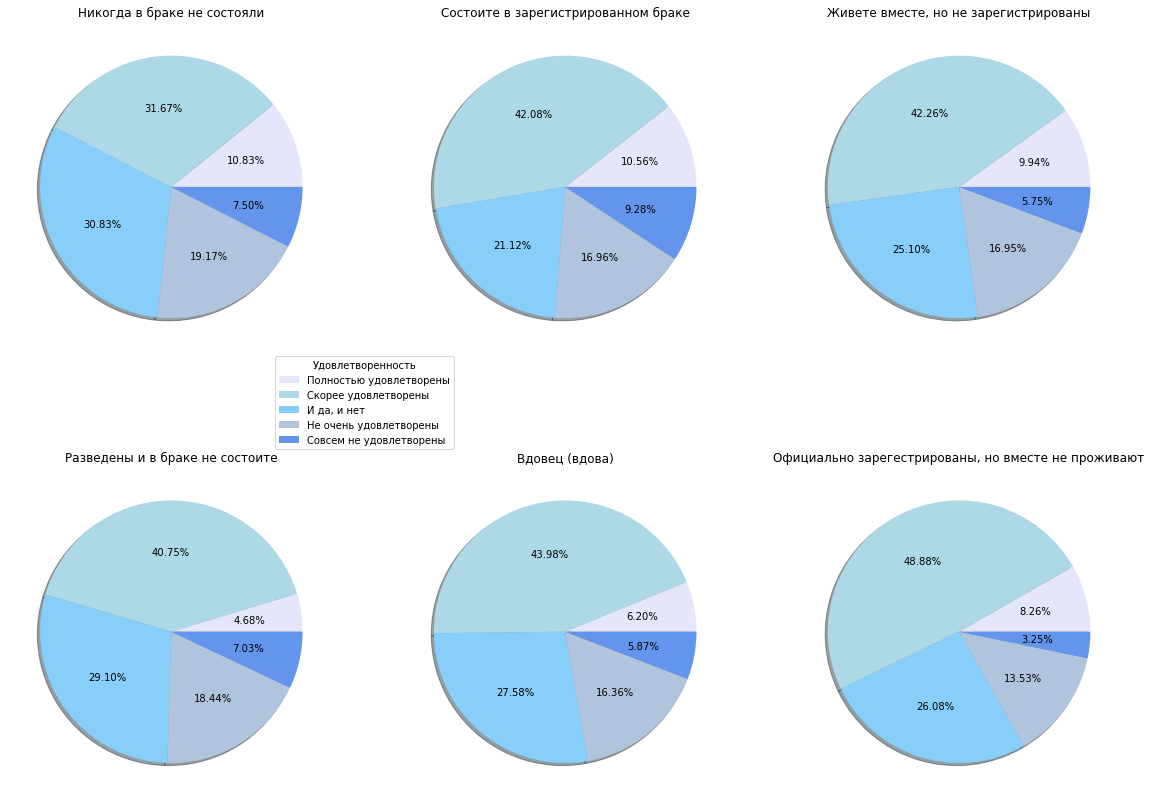

In [24]:
data_1 = data[data["z_diplom"] == 1].value_counts('zj65').drop(labels = [99999997.0]).sort_index()
data_2  = data[(data["z_diplom"] == 2)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()
data_3  = data[(data["z_diplom"] == 3)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()
data_4 = data[data["z_diplom"] == 4].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()
data_5  = data[(data["z_diplom"] == 5)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()
data_6  = data[(data["z_diplom"] == 6)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()

label_name = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены"]

fig, axs = plt.subplots(figsize=(20, 15),nrows= 2 , ncols=3)
colors =[ 'lavender', 'lightblue', 'lightskyblue', 'lightsteelblue', 'cornflowerblue']
axs[0][0].pie(data_1, autopct="%.2f%%", colors = colors, shadow = True)
axs[0][0].set_title("Никогда в браке не состояли")
axs[0][1].pie(data_2, autopct="%.2f%%", colors = colors, shadow = True)
axs[0][1].set_title("Состоите в зарегистрированном браке")
axs[0][2].pie(data_3, autopct="%.2f%%", colors = colors, shadow = True)
axs[0][2].set_title("Живете вместе, но не зарегистрированы")
axs[1][0].pie(data_4, autopct="%.2f%%", colors = colors, shadow = True)
axs[1][0].set_title("Разведены и в браке не состоите")
axs[1][1].pie(data_5, autopct="%.2f%%", colors = colors, shadow = True)
axs[1][1].set_title("Bдовец (вдова)")
axs[1][2].pie(data_6, autopct="%.2f%%", colors = colors, shadow = True)
axs[1][2].set_title("Официально зарегестрированы, но вместе не проживают")


axs[0][0].legend(label_name,
          title="Удовлетворенность",
          loc="upper left",
          bbox_to_anchor=(0.8, -1, 0.5, 1))
plt.show()

In [31]:
data[data["zm131"] == 1].value_counts('zj65').drop(labels = [99999998.0])

zj65
3.0    235
2.0    233
4.0    212
5.0    126
1.0     25
Name: count, dtype: int64

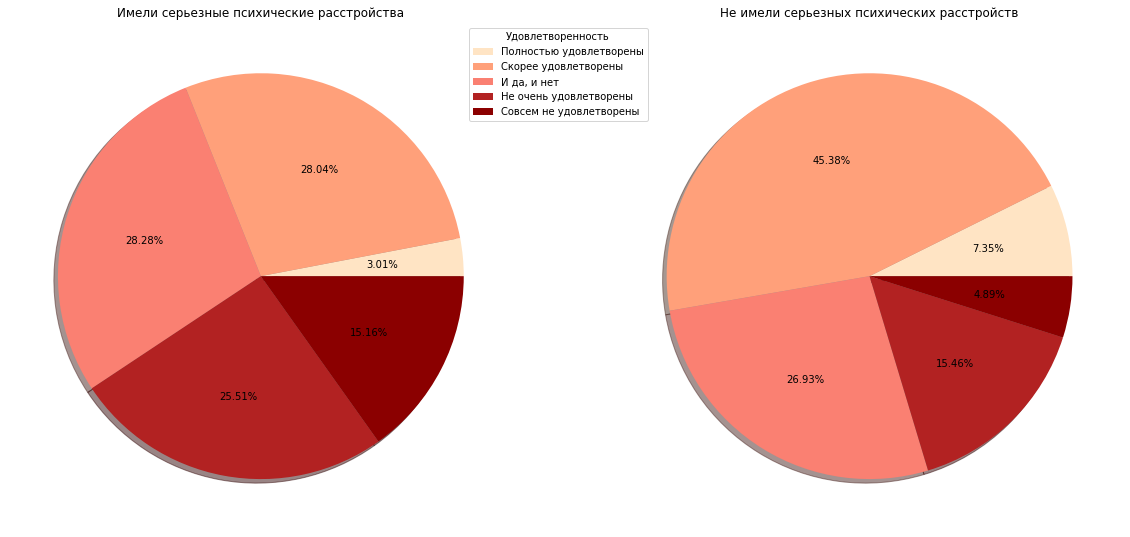

In [192]:
data_depressed = data[data["zm131"] == 1]
data_nodepressed = data[data["zm131"] == 2]
data_zj65_depressed = data_depressed.value_counts('zj65').drop(labels = [99999998.0]).sort_index()
data_zj65_nodepressed = data_nodepressed.value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()
label_name = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены"]



fig, axs = plt.subplots(figsize=(20, 30),nrows= 1 , ncols=2)
colors =['bisque', 'lightsalmon', 'salmon', 'firebrick', 'darkred']
axs[0].pie(data_zj65_depressed, autopct="%.2f%%", colors = colors, shadow = True)
axs[0].set_title("Имели серьезные психические расстройства")
axs[1].pie(data_zj65_nodepressed, autopct="%.2f%%", colors = colors, shadow = True)
axs[1].set_title("Не имели серьезных психических расстройств")

axs[0].legend(label_name,
          title="Удовлетворенность",
          loc="upper left",
          bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

## Материальное положение

In [15]:
data_for_corr = data[['zj65','zj66_1']].dropna()
data_for_corr = data_for_corr[data_for_corr['zj65'].isin([1.0, 2.0, 3.0, 4.0,5.0])]
data_for_corr = data_for_corr[data_for_corr['zj66_1'].isin([1.0, 2.0, 3.0, 4.0,5.0])]
data_for_corr
rho, p = spearmanr(data_for_corr['zj65'], data_for_corr['zj66_1'])
print(rho, p)

0.4720937051626304 0.0


0 --- Полностью удовлетворены
1 --- Скорее удовлетворены
2 --- И да, и нет
3 --- Не очень удовлетворены
4 --- Совсем не удовлетворены


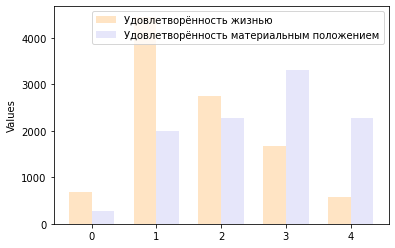

In [27]:
categories = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены"]
fig, ax = plt.subplots()

x = np.arange(len(data_for_corr.value_counts('zj65').sort_index().keys().to_list()))

ax.bar(x, data_for_corr.value_counts('zj65').sort_index().values, width=0.35, label='Удовлетворённость жизнью', color='bisque' )

ax.bar(x+ 0.35, data_for_corr.value_counts('zj66_1').sort_index().values, width=0.35, label='Удовлетворённость материальным положением', color='lavender')
ax.set_xticks(np.arange(len(x)) + 0.35 / 2)
ax.set_xticklabels(x)
ax.set_ylabel('Values')
ax.legend()

for i in range(len(categories)):
    print(i, '---', categories[i])


plt.show()

In [105]:
data_for_corr = data[['zj1_1_3','zj66_1']].dropna()
data_for_corr = data_for_corr[data_for_corr['zj1_1_3'].isin([1.0, 2.0, 3.0, 4.0,5.0])]
data_for_corr = data_for_corr[data_for_corr['zj66_1'].isin([1.0, 2.0, 3.0, 4.0,5.0])]
data_for_corr
rho, p = spearmanr(data_for_corr['zj1_1_3'], data_for_corr['zj66_1'])
print(rho, p)

0.5050330572238572 0.0


0 --- Полностью удовлетворены
1 --- Скорее удовлетворены
2 --- И да, и нет
3 --- Не очень удовлетворены
4 --- Совсем не удовлетворены


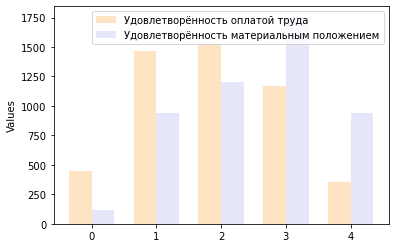

In [106]:
categories = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены"]
fig, ax = plt.subplots()

x = np.arange(len(data_for_corr.value_counts('zj1_1_3').sort_index().keys().to_list()))

ax.bar(x, data_for_corr.value_counts('zj1_1_3').sort_index().values, width=0.35, label='Удовлетворённость оплатой труда', color='bisque' )

ax.bar(x+ 0.35, data_for_corr.value_counts('zj66_1').sort_index().values, width=0.35, label='Удовлетворённость материальным положением', color='lavender')
ax.set_xticks(np.arange(len(x)) + 0.35 / 2)
ax.set_xticklabels(x)
ax.set_ylabel('Values')
ax.legend()

for i in range(len(categories)):
    print(i, '---', categories[i])


plt.show()

## Сравнение по годам

In [83]:
data2 = pd.read_spss("r22i_os_52.sav")
data2

,idind,rredid_i,rid_i,rid_h,qid_i,qid_h,pid_i,pid_h,oid_i,oid_h,...,rm109,rm111,rs1.1,rs1.2,rs2,rs3,rs4,rs5,rs6,rs7
0,7.0,102301.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,102401.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,1000401.0,10004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.0,103301.0,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,1002401.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37.0,103302.0,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,1002402.0,10024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60.0,104602.0,1004702.0,10047.0,1004702.0,10047.0,1004702.0,10047.0,1004702.0,10047.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16082,50366.0,782604.0,161050604.0,1610506.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Нет,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ
16083,50367.0,783604.0,161052404.0,1610524.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Нет,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",ЗАПИСАНО НЕДОСТАТОЧНО ИНФОРМАЦИИ
16084,50373.0,784702.0,161600302.0,1616003.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16085,51176.0,31604.0,117021504.0,1170215.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Нет,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",НАДЕЖНАЯ


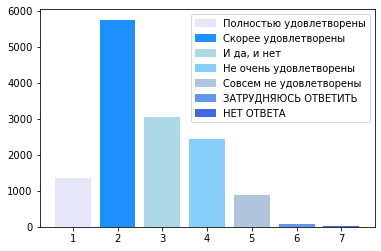

In [155]:
fig, ax = plt.subplots(1,1)
data_udov = data2.value_counts('rj65').sort_values(key=lambda x: x.map({1366: 1, 5754:2, 3047:3, 2437:4, 880:5, 88:6, 23:7}))
label_name = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены", "ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]
label_code = ['1', '2', '3', '4', '5', '6', '7']
colors = {'Полностью удовлетворены':'lavender', "Скорее удовлетворены":'dodgerblue', 'И да, и нет':'lightblue', 'Не очень удовлетворены':'lightskyblue', 'Совсем не удовлетворены':'lightsteelblue', 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ':'cornflowerblue', 'НЕТ ОТВЕТА':'royalblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)




ax.bar(label_code, list(data_udov.values), label = labels, color = colors.values())

plt.show()

In [163]:
data2["rj65"]

0           Скорее удовлетворены
1           Скорее удовлетворены
2         Не очень удовлетворены
3        Совсем не удовлетворены
4         Не очень удовлетворены
                  ...           
16082                        NaN
16083                        NaN
16084    Совсем не удовлетворены
16085                        NaN
16086       Скорее удовлетворены
Name: rj65, Length: 16087, dtype: category
Categories (7, object): ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'И да, и нет', 'НЕТ ОТВЕТА', 'Не очень удовлетворены', 'Полностью удовлетворены', 'Скорее удовлетворены', 'Совсем не удовлетворены']

In [173]:
def rep(x):
    if x == "Полностью удовлетворены":
        return 1.0
    elif x == "Скорее удовлетворены":
        return 2.0
    elif x == "И да, и нет":
        return 3.0
    elif x == "Не очень удовлетворены":
        return 4.0
    elif x == "Совсем не удовлетворены":
        return 5.0

data_2021 = data[(data["zj65"] != 99999999.0) & (data["zj65"] != 99999997.0) & (data["zj65"] != 99999998.0)]['zj65'].dropna()
data_2013 = data2[(data2["rj65"] != 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ') & (data2["rj65"] != 'НЕТ ОТВЕТА')]['rj65'].dropna().apply(rep)

stats.f_oneway(data_2013, data_2021)

F_onewayResult(statistic=1.424515708161601, pvalue=0.23267350417478694)

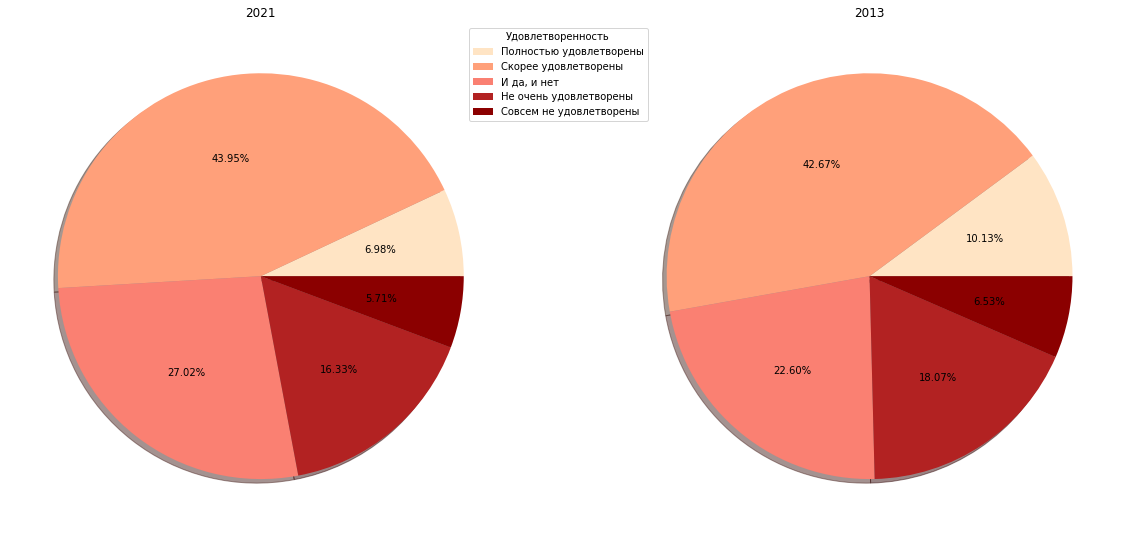

In [158]:
data_zj65_depressed = data.value_counts('zj65').drop(labels = [99999998.0, 99999997.0, 99999999.0]).sort_index()
data_zj65_nodepressed = data2.value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_values(key=lambda x: x.map({1366: 1, 5754:2, 3047:3, 2437:4, 880:5}))
label_name = ["Полностью удовлетворены", "Скорее удовлетворены", "И да, и нет", "Не очень удовлетворены", "Совсем не удовлетворены"]



fig, axs = plt.subplots(figsize=(20, 30),nrows= 1 , ncols=2)
colors =['bisque', 'lightsalmon', 'salmon', 'firebrick', 'darkred']
axs[0].pie(data_zj65_depressed, autopct="%.2f%%", colors = colors, shadow = True)
axs[0].set_title("2021")
axs[1].pie(data_zj65_nodepressed, autopct="%.2f%%", colors = colors, shadow = True)
axs[1].set_title("2013")

axs[0].legend(label_name,
          title="Удовлетворенность",
          loc="upper left",
          bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

In [196]:
data2[(data2["r_age"].astype('float') < 25)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[1:5:3]

rj65
Не очень удовлетворены     209
Совсем не удовлетворены     76
Name: count, dtype: int64

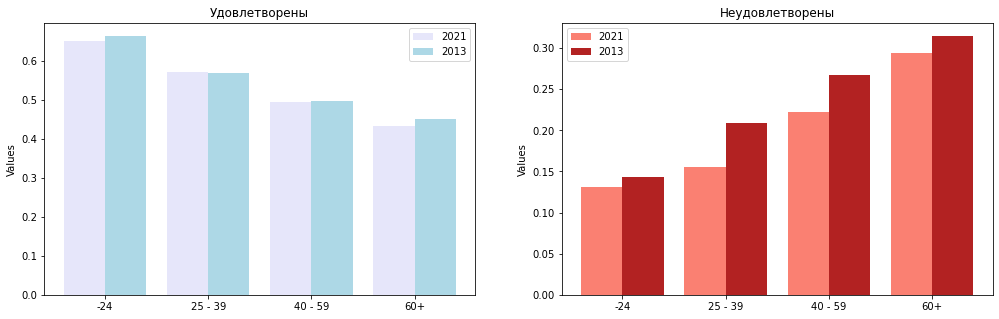

In [195]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(17, 5))
data_1 = (data[(data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[0:2].sum() 
          / data[(data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_2  = (data[(data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[0:2].sum() /
          data[(data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_3  = (data[ (data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[0:2].sum() /
          data[(data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_4 = (data[ (data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()[0:2].sum() /
         data[(data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index().sum())


data_5  = (data2[(data2["r_age"].astype('float') < 25)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[[2,3]].sum() /
          data2[(data2["r_age"].astype('float') < 25)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index().sum())
data_6  = (data2[(data2["r_age"].astype('float') >= 25) & (data2["r_age"].astype('float') < 40)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[[2,3]].sum() /
          data2[(data2["r_age"].astype('float') >= 25) & (data2["r_age"].astype('float') < 40)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index().sum())
data_7  = (data2[(data2["r_age"].astype('float') >= 40) & (data2["r_age"].astype('float') < 60)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[[2,3]].sum() / 
          data2[(data2["r_age"].astype('float') >= 40) & (data2["r_age"].astype('float') < 60)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index().sum())
data_8  = (data2[(data2["r_age"].astype('float') >= 60)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[[2,3]].sum() /
          data2[(data2["r_age"].astype('float') >= 60)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index().sum())
x = np.arange(len(["-24", "25 - 39","40 - 59","60+"]))

# x = np.arange(len(data_for_corr.value_counts('zj1_1_3').sort_index().keys().to_list()))

data_man_by_age = [data_1, data_2, data_3, data_4]
data_woman_by_age = [data_5, data_6, data_7, data_8]
ax[0].bar(x, data_man_by_age, width=0.4, label='2021', color='lavender')
ax[0].bar(x + 0.4, data_woman_by_age, width=0.4, label='2013', color='lightblue')
ax[0].set_xticks(np.arange(len(x)) + 0.4 / 2)
ax[0].set_xticklabels(["-24", "25 - 39","40 - 59","60+"])
ax[0].set_ylabel('Values')
ax[0].set_title('Удовлетворены')
ax[0].legend()



data_1 = (data[(data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[4:5].sum() 
          / data[(data["z_age"] < 25)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_2  = (data[(data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[4:5].sum() /
          data[(data["z_age"] >= 25) & (data["z_age"] < 40)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_3  = (data[(data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index()[4:5].sum() /
          data[(data["z_age"] >= 40) & (data["z_age"] < 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0]).sort_index().sum())
data_4 = (data[(data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index()[4:5].sum() /
         data[(data["z_age"] >= 60)].value_counts('zj65').drop(labels = [99999997.0, 99999999.0, 99999998.0]).sort_index().sum())

data_5  = (data2[(data2["r_age"].astype('float') < 25)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[1:5:3].sum() /
          data2[(data2["r_age"].astype('float') < 25)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index().sum())
data_6  = (data2[(data2["r_age"].astype('float') >= 25) & (data2["r_age"].astype('float') < 40)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[1:5:3].sum() /
          data2[(data2["r_age"].astype('float') >= 25) & (data2["r_age"].astype('float') < 40)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index().sum())
data_7  = (data2[(data2["r_age"].astype('float') >= 40) & (data2["r_age"].astype('float') < 60)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[1:5:3].sum() / 
          data2[(data2["r_age"].astype('float') >= 40) & (data2["r_age"].astype('float') < 60)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index().sum())
data_8  = (data2[(data2["r_age"].astype('float') >= 60)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index()[1:5:3].sum() /
          data2[(data2["r_age"].astype('float') >= 60)].value_counts('rj65').drop(labels = ["ЗАТРУДНЯЮСЬ ОТВЕТИТЬ", "НЕТ ОТВЕТА"]).sort_index().sum())
x = np.arange(len(["-24", "25 - 39","40 - 59","60+"]))

# x = np.arange(len(data_for_corr.value_counts('zj1_1_3').sort_index().keys().to_list()))

data_man_by_age = [data_1, data_2, data_3, data_4]
data_woman_by_age = [data_5, data_6, data_7, data_8]
ax[1].bar(x, data_man_by_age, width=0.4, label='2021', color='salmon')
ax[1].bar(x + 0.4, data_woman_by_age, width=0.4, label='2013', color='firebrick')
ax[1].set_xticks(np.arange(len(x)) + 0.4 / 2)
ax[1].set_xticklabels(["-24", "25 - 39","40 - 59","60+"])
ax[1].set_title('Неудовлетворены')
ax[1].set_ylabel('Values')
ax[1].legend()

plt.show()